# Objects Above: 
## TLE Data Analysis 


Small project to analyse the number of Debris objects in the Space-Track TLE-catalogue above a given location on Earth 

Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import time
import datetime

#initialize orekit and JVM
import orekit
orekit.initVM()

from orekit.pyhelpers import setup_orekit_curdir
setup_orekit_curdir()

In [3]:
from org.orekit.data import DataProvidersManager, ZipJarCrawler
from org.orekit.frames import FramesFactory, TopocentricFrame
from org.orekit.bodies import OneAxisEllipsoid, GeodeticPoint
from org.orekit.time import TimeScalesFactory, AbsoluteDate, DateComponents, TimeComponents
from org.orekit.utils import IERSConventions, Constants
from org.orekit.models.earth import ReferenceEllipsoid
from org.orekit.propagation.analytical.tle import TLE, TLEPropagator
from java.io import File

from math import radians, pi

The TLE data is imported from a textfile downloaded from Space-Track.org containing the full catalogue of TLE's

In [4]:
#all
text_file = open("TLE_data.txt", "r")
tle_data = text_file.readlines()
text_file.close()

The TLE data is then converted into the orkit TLE class 

In [7]:
mytle = [] #List of all TLE's in the Space-Track catalogue 
mytle_DEB =[] #list of all debris TLE's 
mytle_LEO_DEB =[] #List of all LEO debris TLE's

for i in range(int(len(tle_data)/3)): # Iterates over TLE's
    tle = TLE(tle_data[3*i+1],tle_data[3*i+2])
    mytle.append(tle)
    if(tle_data[3*i].find('DEB') != -1): # Check if TLE is Debris 
        tle = TLE(tle_data[3*i+1],tle_data[3*i+2])
        mytle_DEB.append(tle)
        n = tle.getMeanMotion()*2*np.pi/(24*60*60)   # mean motion rad/sec
        mu = Constants.EGM96_EARTH_MU  # Earth radius
        a = mu**(1/3)/(n*(24*60*60/(2*pi)))**(2/3)  # semi-major axis
        h = (a-Constants.WGS84_EARTH_EQUATORIAL_RADIUS)*10**(-3)  #Approx altitude
        if(h <= 2000): # Checks if TLE is in LEO
            mytle_LEO_DEB.append(tle) 
            
print("Number of Debris TLE's in LEO:"+ str(len(mytle_LEO_DEB)))
print("Number of Debris TLE's: " + str(len(mytle_DEB)))
print("Number of TLE's in Catalogue: "+ str(len(mytle))) 

Number of Debris TLE's in LEO:9827
Number of Debris TLE's: 11029
Number of TLE's in Catalogue: 19043


# Date

Enter the date you want to do the calculations for 

In [2]:
year = 2020
month = 4
day = 22

date = [year, day, month]

# Reference frames 

Create orekit reference frames.

In [13]:
ITRF = FramesFactory.getITRF(IERSConventions.IERS_2010, True)
earth =  ReferenceEllipsoid.getWgs84(ITRF) 

Topocentric Trondheim frame

In [14]:
TrLongitude = 10.3933
TrLatitude  = 63.42972
altitude  = 0.0
Trondheim = GeodeticPoint(radians(TrLongitude), radians(TrLatitude), altitude)
TrondFrame = TopocentricFrame(earth, Trondheim, "Trondheim")

Topcentric Andøya Space Center frame

In [15]:
AndLongitude = 16.019810
AndLatitude  = 69.2944
altitude  = 0.0
Andoya = GeodeticPoint(radians(AndLongitude), radians(AndLatitude), altitude)
AndFrame = TopocentricFrame(earth, Andoya, "Andoya")


Guiana space centre (French Guiana)

In [16]:
GuLongitude = -52.773611 
GuLatitude  = 5.222222
altitude  = 0.0
Guiana = GeodeticPoint(radians(GuLatitude), radians(GuLongitude), altitude)
GuFrame = TopocentricFrame(earth, Guiana, "Guiana")

Rocket Lab Launch Complex 1 (New Zealand)

In [17]:
RlLongitude = 177.8649
RlLatitude  = -39.2615
altitude  = 0.0
RocketLab = GeodeticPoint(radians(RlLatitude), radians(RlLongitude), altitude)
RlFrame = TopocentricFrame(earth, RocketLab, "RocketLab")

Satish Dhawan Space Centre (India)

In [18]:
SaLongitude = 80.230278
SaLatitude  = 13.72
altitude  = 0.0
Satish = GeodeticPoint(radians(SaLatitude), radians(SaLongitude), altitude)
SaFrame = TopocentricFrame(earth, Satish, "Satish")

# Locations

C:\Users\nilsj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


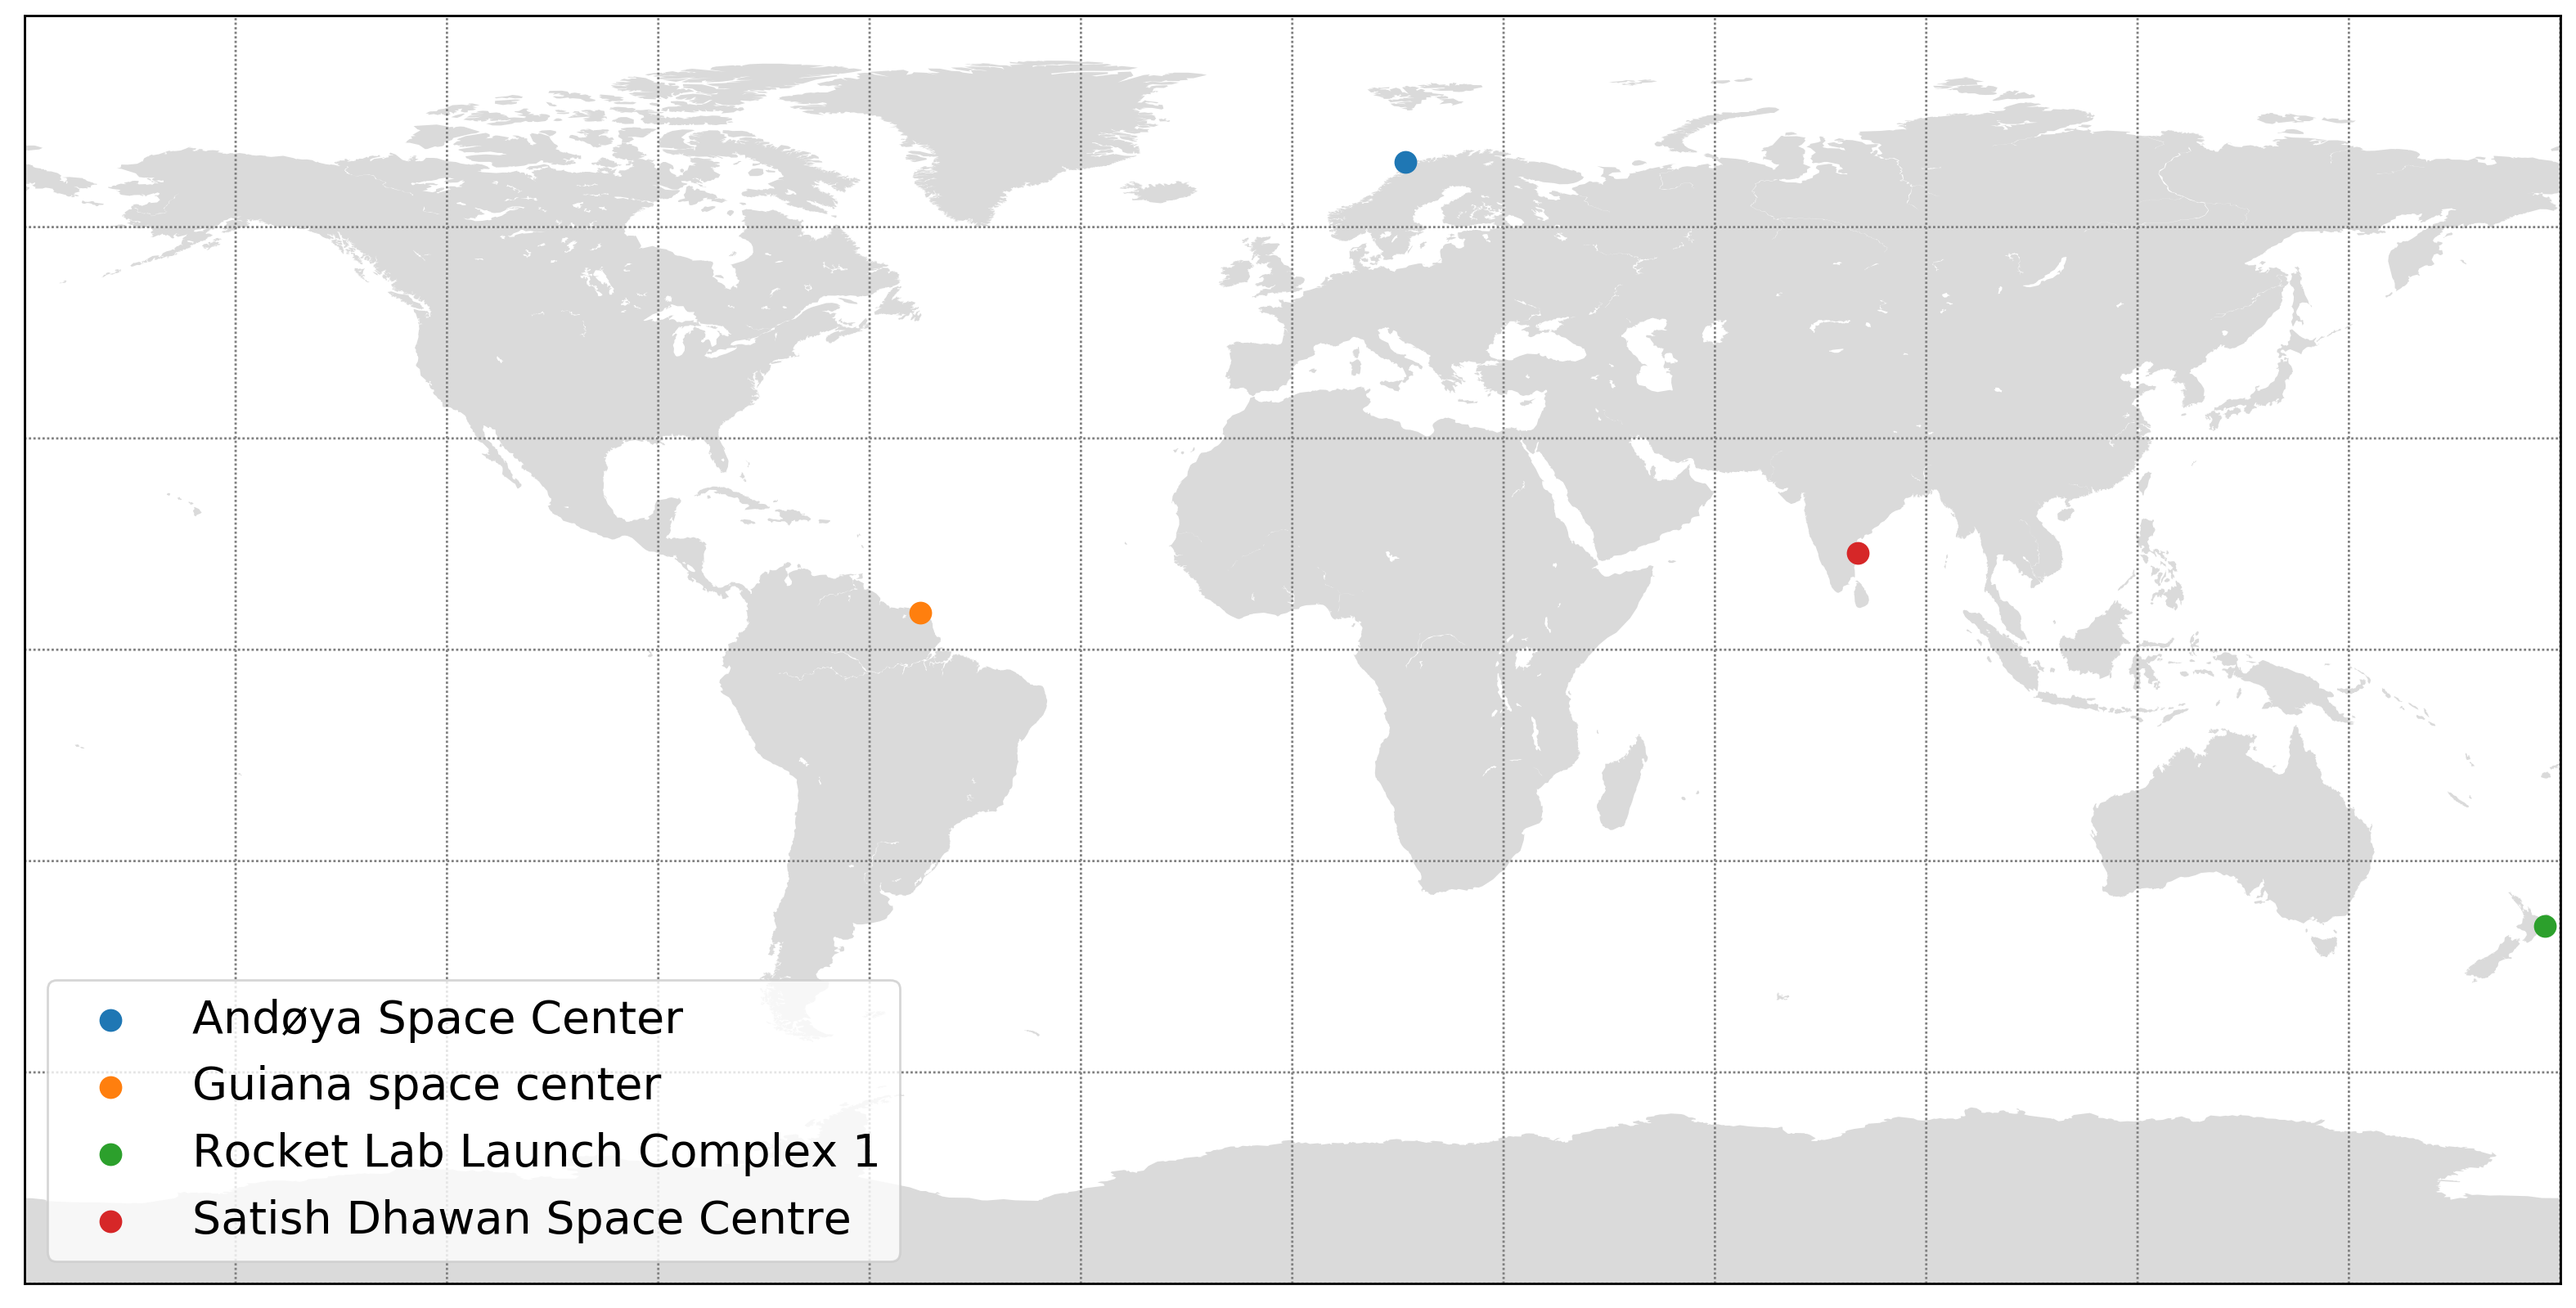

In [19]:
m = Basemap(projection='cyl', resolution='l',area_thresh=None)

m.drawmapboundary()     # fill_color='aqua')
m.fillcontinents(color='#dadada', lake_color='white')
#m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(-180, 180, 30), color='gray')
m.drawparallels(np.arange(-90, 90, 30), color='gray');

plt.title('')
m.scatter(AndLongitude, AndLatitude,s=81, alpha=1.0, zorder=3, marker='o',label = 'Andøya Space Center');
m.scatter(GuLongitude, GuLatitude,s=81, alpha=1.0, zorder=3, marker='o',label = 'Guiana space center');
m.scatter(RlLongitude, RlLatitude,s=81, alpha=1.0, zorder=3, marker='o',label = 'Rocket Lab Launch Complex 1');
m.scatter(SaLongitude, SaLatitude,s=81, alpha=1.0, zorder=3, marker='o',label = 'Satish Dhawan Space Centre');

#m.scatter(AzLongitude, AzLatitude, alpha=1.0, zorder=3, marker='o',label = 'Azores Spaceport');
#m.scatter(KeLongitude, KeLatitude, alpha=1.0, zorder=3, marker='o',label = 'Kennedy Space Center');
#m.scatter(BaLongitude, BaLatitude, alpha=1.0, zorder=3, marker='o',label = 'Baikonur Cosmodrome');
#m.scatter(JiLongitude, JiLatitude, alpha=1.0, zorder=3, marker='o',label = 'Jiuquan Launch Center');
plt.legend(loc='lower left',fontsize = 20)
plt.savefig("launchSites.png")

# Temporal satellite counter 
Calculates the number of satelites above an angle with the horizon as a function of time for a given topographic frame.

In [31]:
def temporal_satellite_counter(tle_list,frame,angle,days):
    '''
    Calculates number of satelites with an elevation grater than a given angle 
    over a given refference frame for a given number of days
    
    Input: 
    tle_list = list of TLE's
    frame = referrence frame
    angle = angle in degrees
    days = number of days
    
    Output: 
    number of satellites 
    '''
    startDate =  AbsoluteDate(date[0], date[1], date[2], 0, 0, 00.000, TimeScalesFactory.getUTC())
    inertialFrame = FramesFactory.getEME2000()
    
    # Overall duration in seconds for extrapolation
    seconds = 24*60*60  # seconds in a day
    duration = days*seconds 
    step_time = 10*60 # in seconds
    
    # Time array in orekit AbsoluteDate format
    tVec = [startDate.shiftedBy(float(dt)) \
            for dt in np.arange(0, duration, step_time)]
    
    # Satellite counter 
    nSat = np.zeros(int(duration/step_time))
    
    start_time = time.time()
    for sat in tle_list:
        propagator = TLEPropagator.selectExtrapolator(sat)
        pv = [ propagator.getPVCoordinates(tt, inertialFrame) for tt in tVec]
        pos = [tpv.getPosition() for tpv in pv]
        el = [frame.getElevation(tp,inertialFrame,tt)*180.0/pi  for tt, tp in zip(tVec,pos)]
        nSat += np.asarray([ e >= angle for e in el])
    print("--- %s seconds ---" % (time.time() - start_time))
    avg_nSat = np.zeros(int(seconds/step_time))
    for i in range(int(days)):
        avg_nSat += nSat[int(i*(seconds/step_time)):int((i+1)*(seconds/step_time))]/days
        
    return avg_nSat #tt,hSat

# Plots 


Plot parameters

In [21]:
newParams = {'figure.figsize'  : (20, 12),  # Figure size
             'figure.dpi'      : 200,      # figure resolution
             'axes.titlesize'  : 20,       # fontsize of title
             'axes.labelsize'  : 18,       # fontsize of axes labels
             'axes.linewidth'  : 2,        # width of the figure box lines
             'lines.linewidth' : 2,        # width of the plotted lines
             'savefig.dpi'     : 200,      # resolution of a figured saved using plt.savefig(filename)
             'ytick.labelsize' : 16,       # fontsize of tick labels on y axis
             'xtick.labelsize' : 16,       # fontsize of tick labels on x axis
             'legend.fontsize' : 14,       # fontsize of labels in legend
             'legend.frameon'  : True,     # activate frame on lengend?
            }
plt.rcParams.update(newParams) # Set new plotting parameters

# Comparison

Calculates the data for each frame

In [22]:
AndSats = temporal_satellite_counter(mytle_DEB,AndFrame,75.0,1) # Andøya

--- 34.89084601402283 seconds ---


In [23]:
GuSats = temporal_satellite_counter(mytle_DEB,GuFrame,75.0,1) #Guiana

--- 34.30040264129639 seconds ---


In [24]:
RlSats = temporal_satellite_counter(mytle_DEB,RlFrame,75.0,1) #RocketLab

--- 33.46799278259277 seconds ---


In [25]:
SaSats = temporal_satellite_counter(mytle_DEB,SaFrame,75.0,1) #Satish

--- 35.02839469909668 seconds ---


Comparison plot between all the locations 

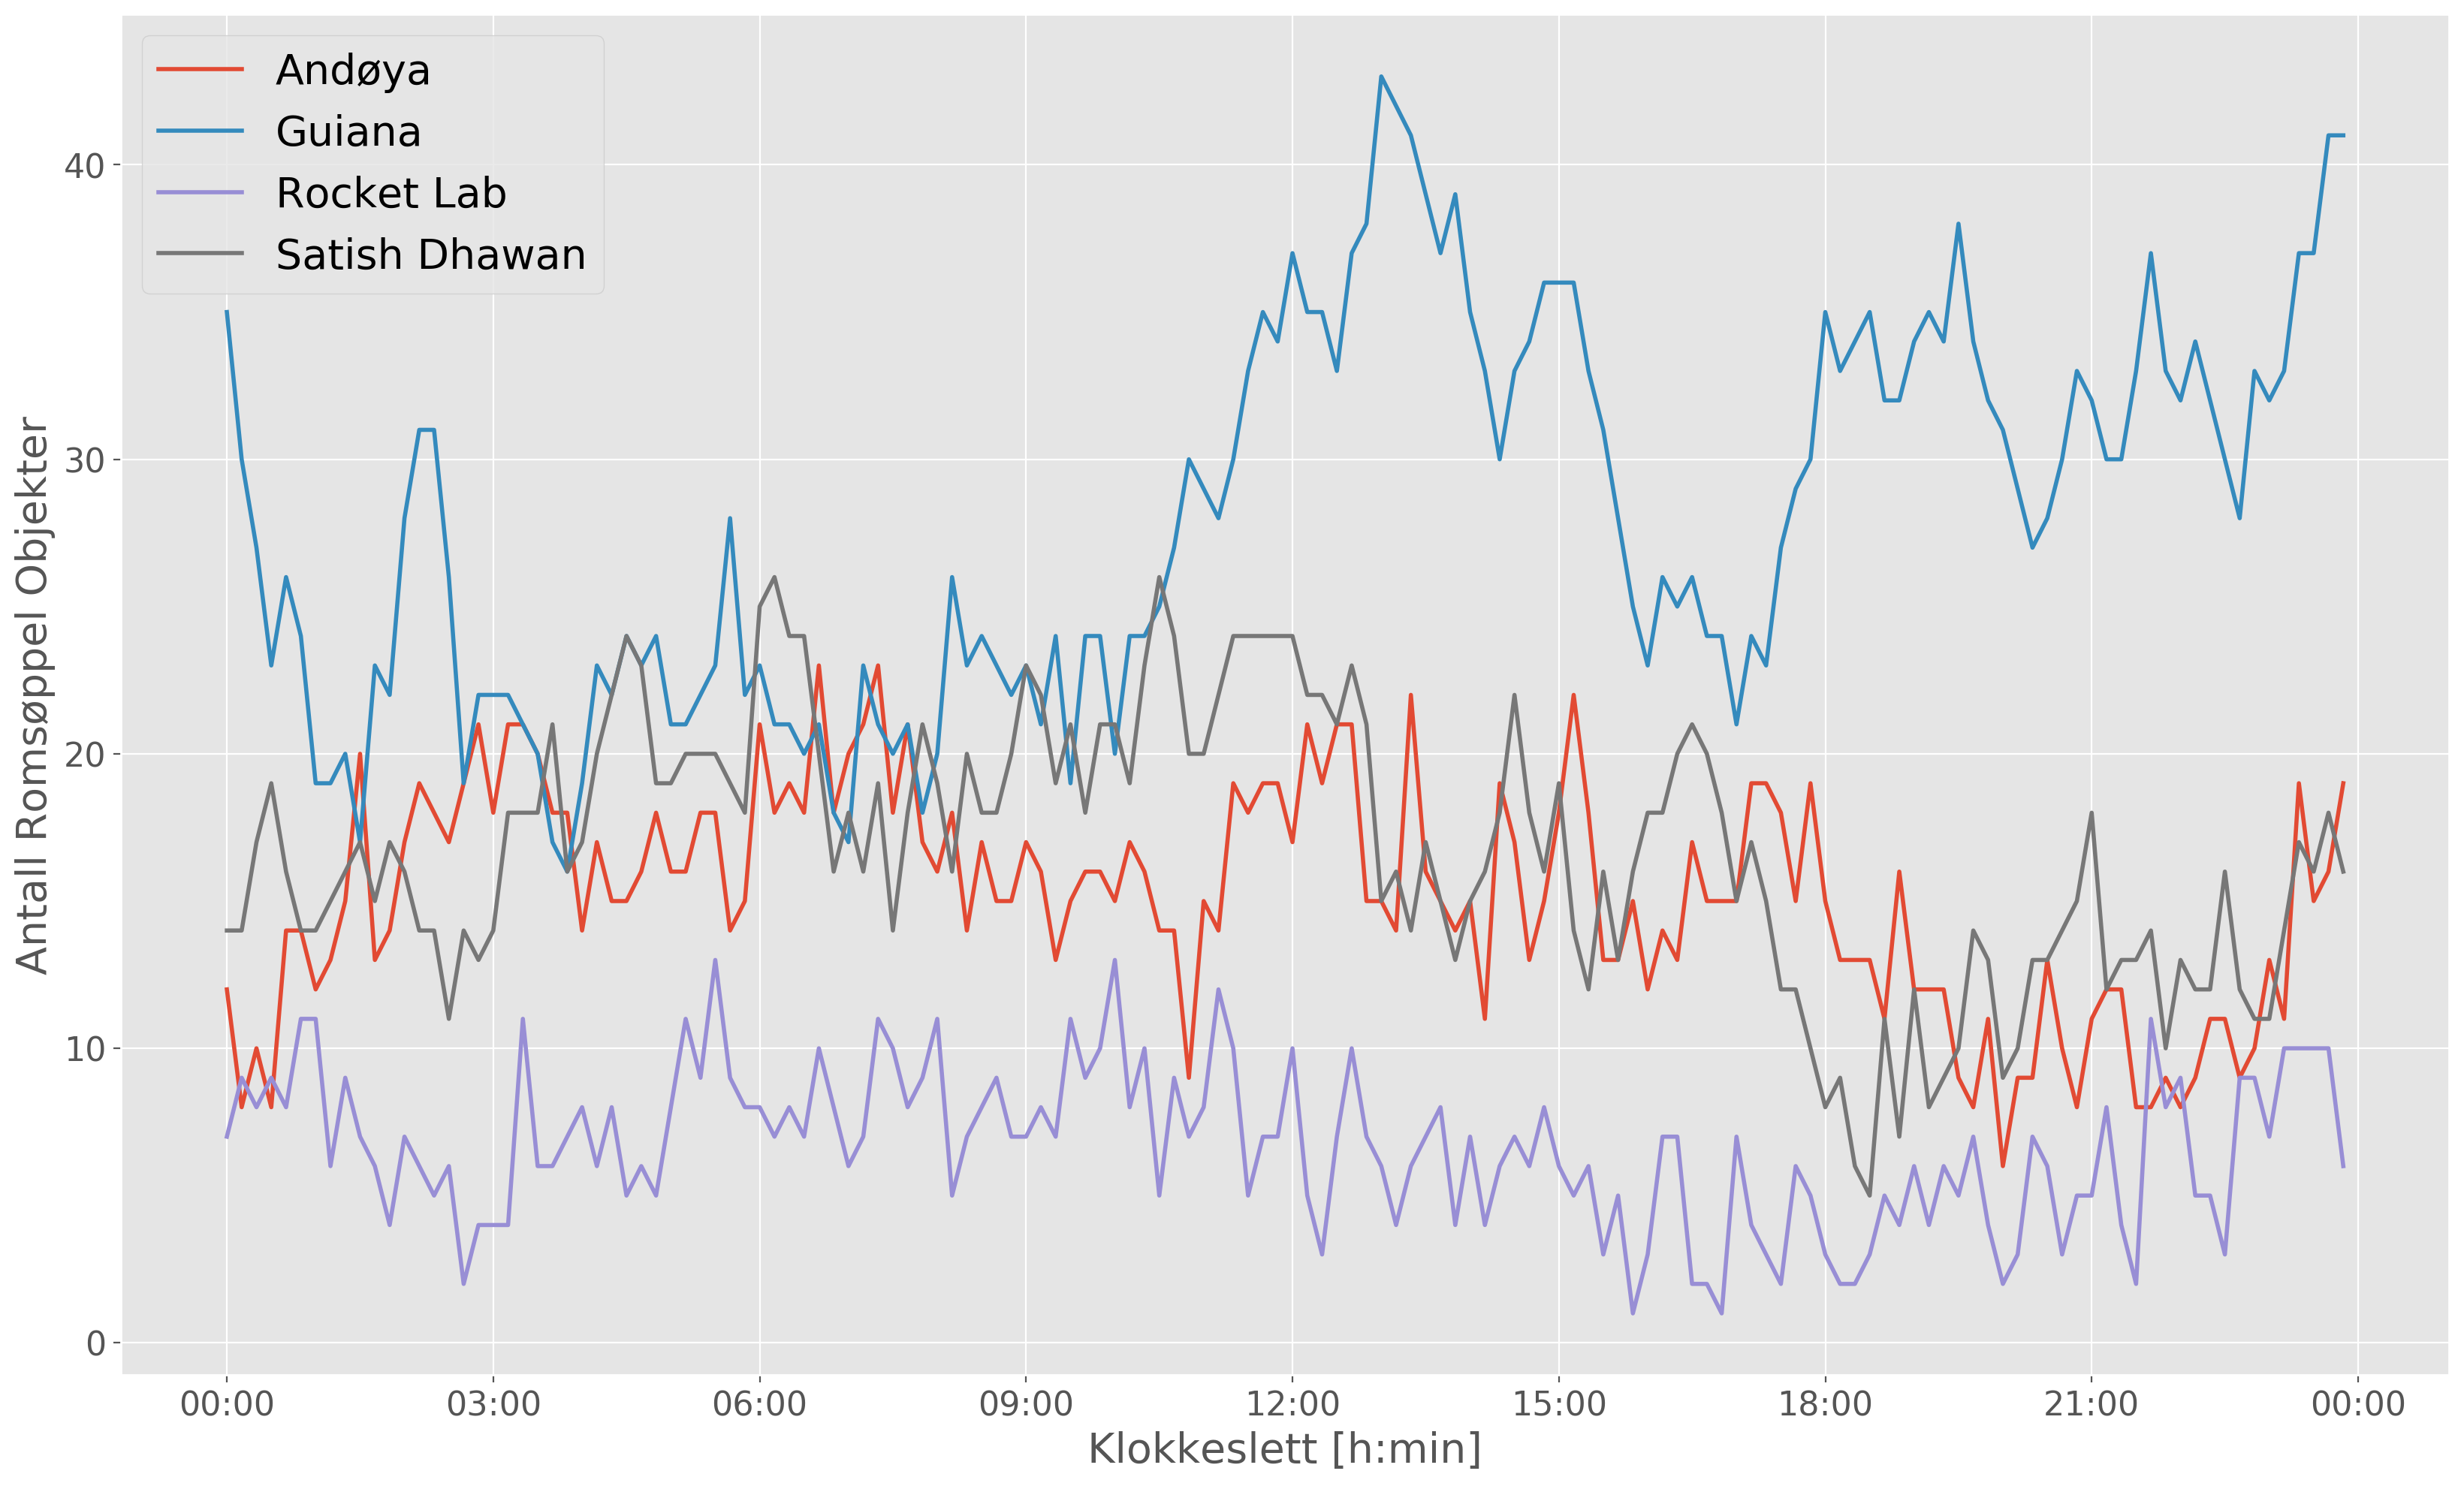

In [29]:
t = [datetime.datetime.strptime('2020-04-22',"%Y-%m-%d") + datetime.timedelta(minutes=10*i) for i in range(len(AndSats))]

plt.plot(t,AndSats,label = "Andøya" )
plt.plot(t,GuSats,label = "Guiana" )
plt.plot(t,RlSats,label = "Rocket Lab" )
plt.plot(t,SaSats,label = "Satish Dhawan" )
plt.style.use('ggplot')
plt.ylabel("Antall Romsøppel Objekter",size = 20)
plt.xlabel("Klokkeslett [h:min]",size = 20)

myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.grid(True)
plt.legend(fontsize = 20)
plt.savefig("satComp.png")
plt.show()

# Trondheim

In [32]:
TrondSats = temporal_satellite_counter(mytle_DEB,TrondFrame,75.0,1) # Trondheim

--- 35.450742959976196 seconds ---


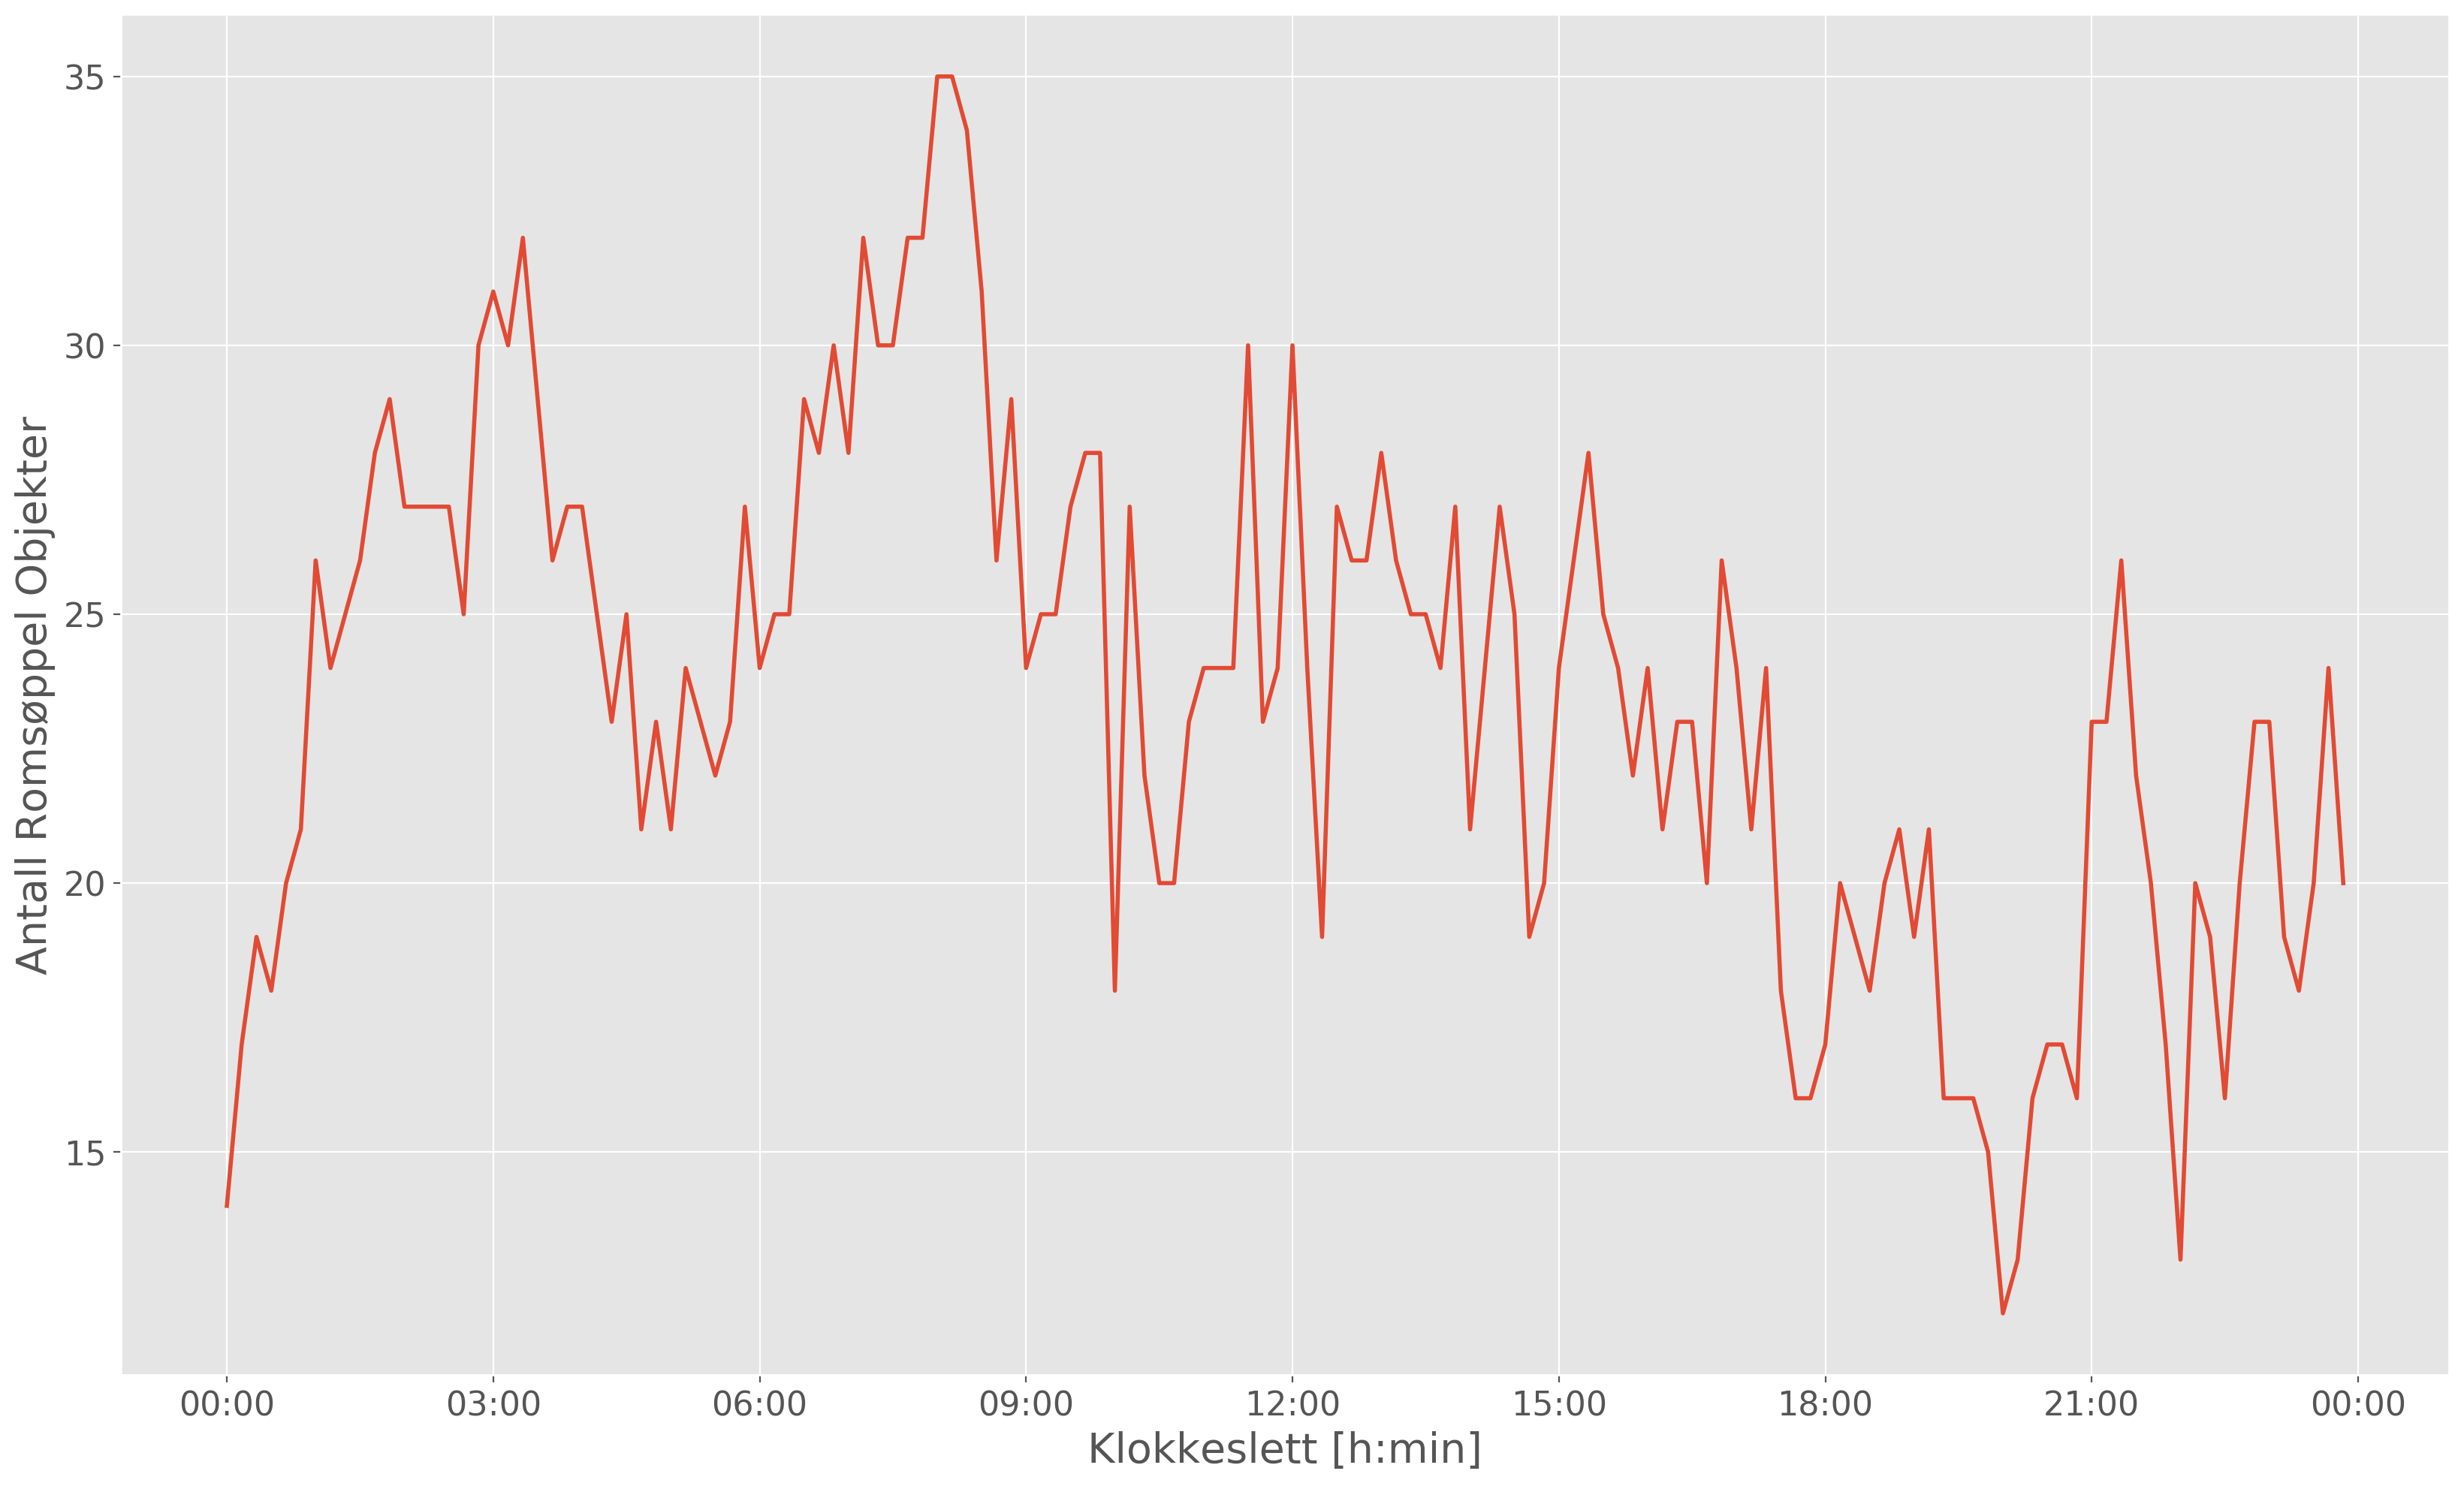

In [33]:
t = [datetime.datetime.strptime('2020-04-22',"%Y-%m-%d") + datetime.timedelta(minutes=10*i) for i in range(len(TrondSats))]

plt.title("")
plt.plot(t,TrondSats,label = "Trondheim" )

#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.style.use('ggplot')
plt.ylabel("Antall Romsøppel Objekter",size = 20)
plt.xlabel("Klokkeslett [h:min]",size = 20)
plt.grid(True)
#plt.legend()
plt.savefig("TrondSatFreq.png")
plt.show()

# Spatial satellite counter 
Number of satellites as a function of height above the earths surface for a given angle and topocentric frame. 

In [528]:
def spatial_satellite_counter(tle_list,frame,days,angle):
     '''
    Calculates number of satelites with an elevation grater than a given angle 
    over a given refference frame for a given number of days
    
    Input: 
    tle_list = list of TLE's
    frame = referrence frame
    angle = angle in degrees
    days = number of days
    
    Output: 
    number of satellites 
    '''
    
    startDate = AbsoluteDate(date[0], date[1], date[2], 0, 0, 00.000, TimeScalesFactory.getUTC())
    inertialFrame = FramesFactory.getEME2000()
    
    # Overall duration in seconds for extrapolation
    duration = days*12 * 60 *60 #in seconds
    step_time = 10 #seconds

    # Time array in orekit AbsoluteDate format
    tVec = [startDate.shiftedBy(float(dt)) \
            for dt in np.arange(0, duration, step_time)]

    rSat = np.asarray([]) #of sats as function of radius
    start_time = time.time()
    for sat in tle_list:
        propagator = TLEPropagator.selectExtrapolator(sat)
        pv = [ propagator.getPVCoordinates(tt, inertialFrame) for tt in tVec]
        pos = [tpv.getPosition() for tpv in pv]
        el = [frame.getElevation(tp,inertialFrame,tt)*180.0/pi  for tt, tp in zip(tVec,pos)]
        if  any(e > angle for e in el):
            r = np.asarray([p.getNorm() for p in pos])
            rSat = np.append(rSat,np.average(r))
    print("--- %s seconds ---" % (time.time() - start_time))
    
    R = Constants.WGS84_EARTH_EQUATORIAL_RADIUS
    #
    rMin = 200  #should not be set to zero to avoid blow up 
    rMax = 2000#default 2000
    I = int(rMax/20) # number of intervals  #default /20
    rSat = rSat/10**3-R/10**3 #change from radius to alltitude and from m to km
    rVec = np.linspace(rMin,rMax,I) # list of r values from r_min to r_maxseperated by 20 km
    nSat = np.zeros(I)
    # Count number of satellites betwwen r_i and r_i+1
    for i in range(I-1):
        nSat[i] = np.float64(np.float64(((rVec[i] < rSat) & (rSat < rVec[i+1])).sum()))/np.float64(2*np.pi/3*(1-np.cos(np.pi/2-radians(angle)))*np.abs(rVec[i+1]**3- rVec[i]**3))
    return rVec, nSat

# Plots

# Comparison

In [326]:
X,Y = spatial_satellite_counter(mytle_LEO_DEB,AndFrame,1,-90.0)

--- 1120.020088672638 seconds ---


In [529]:
AndX, AndY = spatial_satellite_counter(mytle_LEO_DEB,AndFrame, 1, 75.0)

--- 988.068541765213 seconds ---


In [530]:
GuX,GuY = spatial_satellite_counter(mytle_LEO_DEB,GuFrame, 1, 75.0)

--- 994.7592136859894 seconds ---


In [531]:
RlX, RlY = spatial_satellite_counter(mytle_LEO_DEB,RlFrame, 1, 75.0)

--- 1004.113162279129 seconds ---


In [532]:
SaX,SaY = spatial_satellite_counter(mytle_LEO_DEB,SaFrame, 1, 75.0)

--- 1093.2813007831573 seconds ---


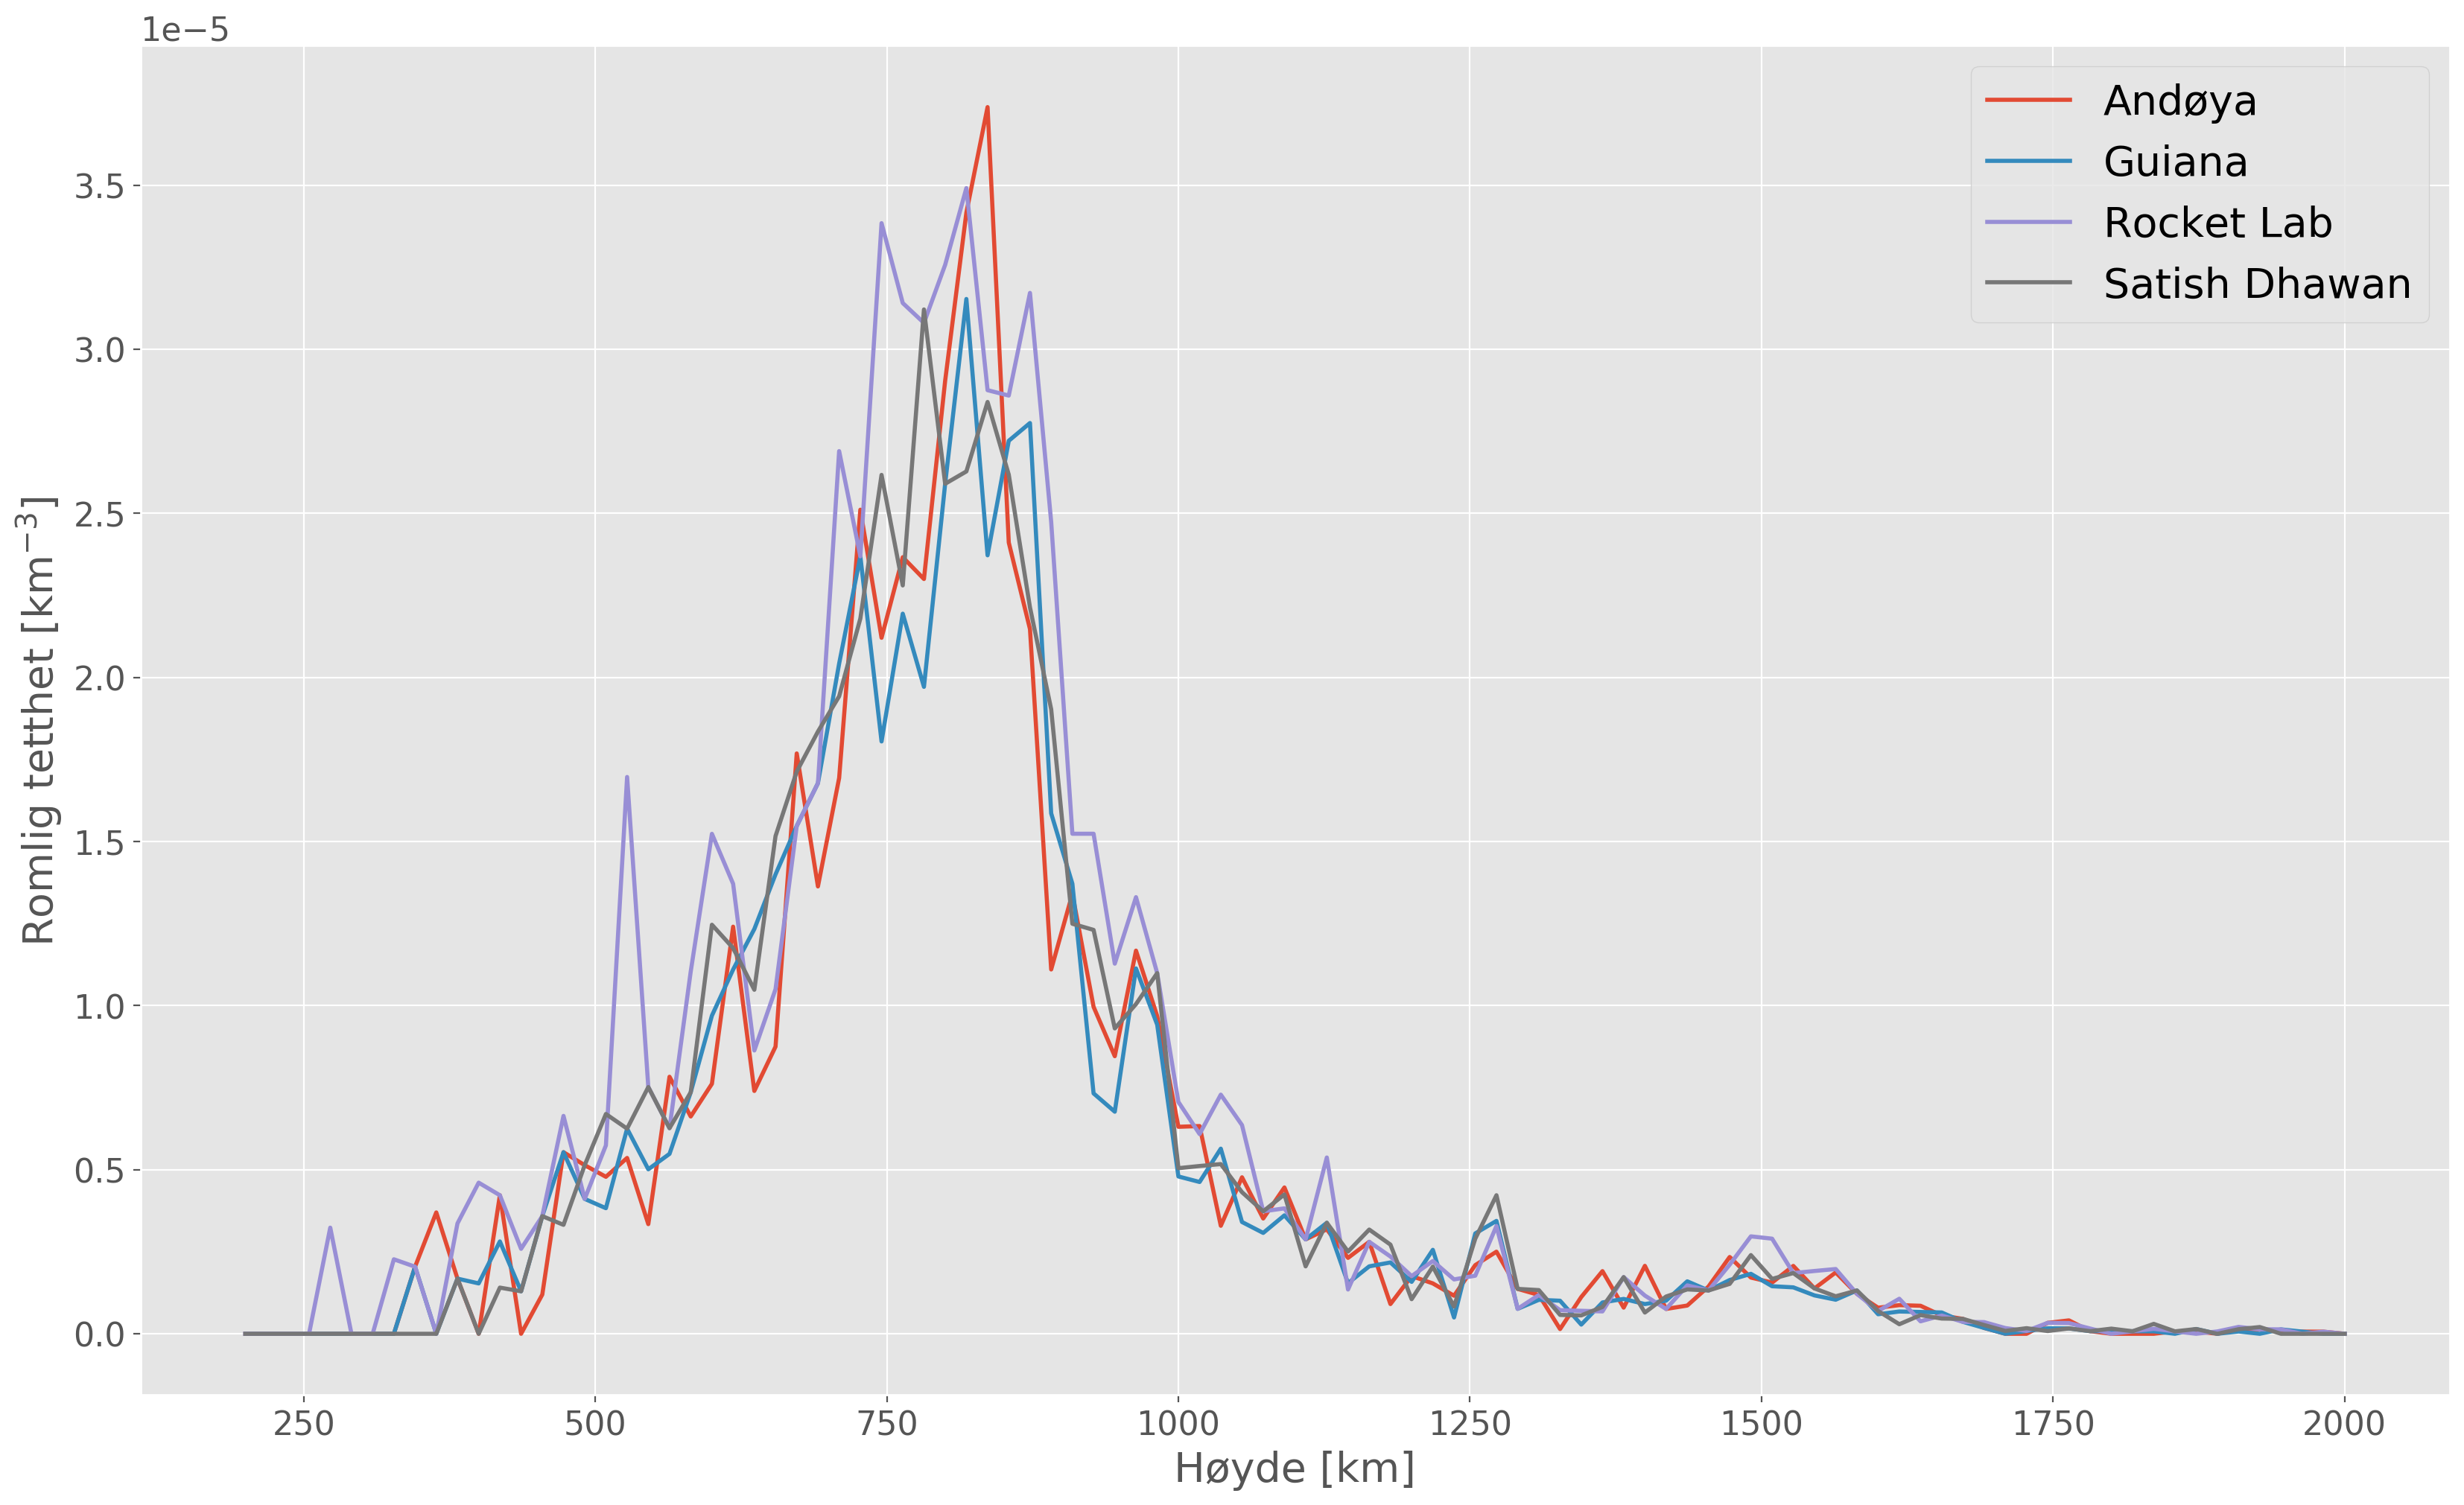

In [577]:
#plt.plot(X,Y,label = "Tot")
plt.plot(AndX,AndY,label = "Andøya")
plt.plot(GuX,GuY, label = "Guiana")
plt.plot(RlX,RlY, label = "Rocket Lab")
plt.plot(SaX,SaY, label = "Satish Dhawan")
plt.ylabel("Romlig tetthet [km$^{-3}$]",size = 20)
plt.xlabel("Høyde [km]",size = 20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)
plt.legend(fontsize = 20)
plt.savefig("SatDensComp.png")
plt.show()

# Trondheim

In [571]:
TrX,TrY = spatial_satellite_counter(mytle_LEO_DEB,TrondFrame, 1, 75.0)

--- 1439.945393562317 seconds ---


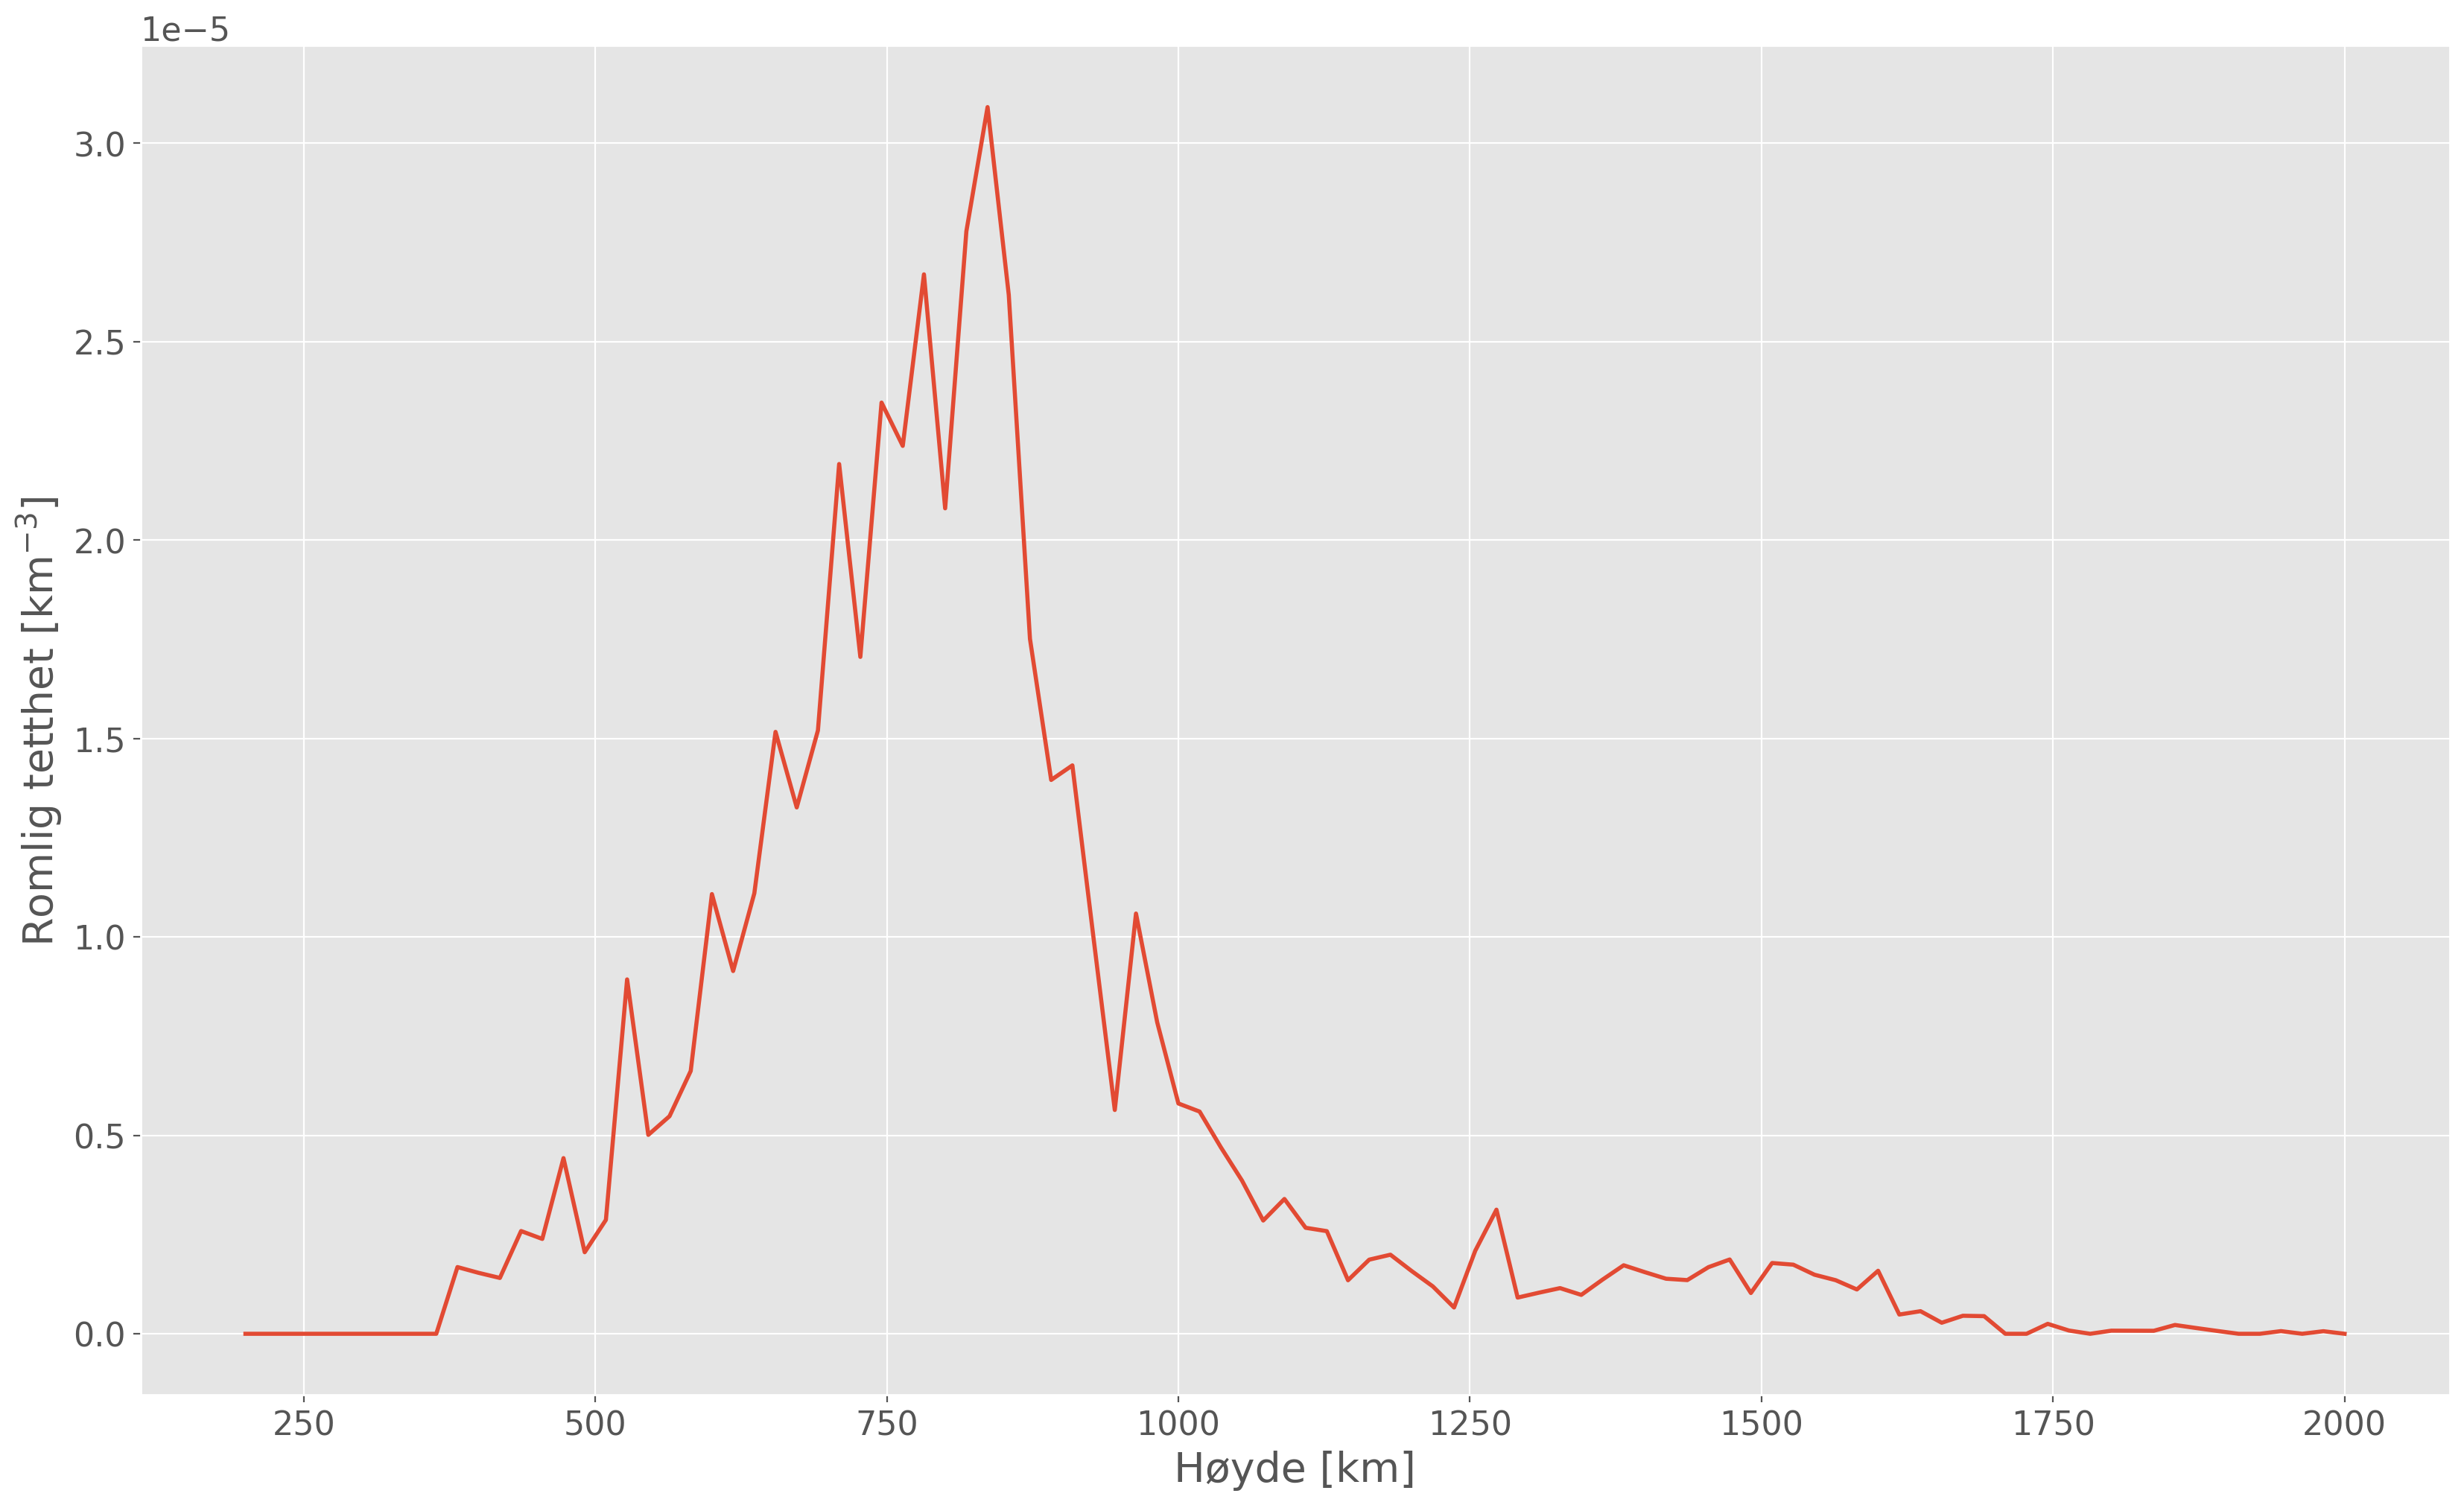

In [575]:
plt.plot(TrX,TrY,label = "Trondheim")
plt.ylabel("Romlig tetthet [km$^{-3}$]",size = 20)
plt.xlabel("Høyde [km]",size = 20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)
plt.savefig("TrondSatDens.png")
plt.show()